# Banking Customer Churn Prediction

* Gonzalo Cano Padilla
* Andre Esteban Vera
* Nicolas Martinez Gutierrez

---

# Objetivos

**Generales:**

**Especificos:**

---

# Marco Teórico

## Introducción al problema

El fenómeno de **churn** o **fuga de clientes** representa uno de los principales desafíos para las instituciones financieras.
En el contexto bancario, el *churn* se define como la **pérdida de clientes** que deciden cerrar sus cuentas o trasladar sus servicios a otro banco.

El proyecto **"Banking Customer Churn Prediction"** tiene como objetivo desarrollar modelos de **clasificación supervisada** que permitan identificar los factores que influyen en la decisión de un cliente de abandonar el banco.
Para ello, se utilizan algoritmos de aprendizaje automático como **Regresión Logística**, **Máquinas de Vectores de Soporte (SVM)** y **Redes Neuronales (MLP)**, optimizando sus hiperparámetros mediante **Optimización Bayesiana**.

## Regresión Logística

La **regresión logística** es un modelo estadístico ampliamente usado en problemas de **clasificación binaria**, donde la variable dependiente toma valores 0 (cliente retenido) o 1 (cliente que abandona).
A diferencia de la regresión lineal, la regresión logística modela la **probabilidad** de que ocurra un evento mediante la función sigmoide:

$$
P(y=1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$

El resultado se interpreta como la **probabilidad de abandono**.
Un umbral (por ejemplo 0.5) determina la clasificación final.
Además, se puede incorporar **regularización** (L1 o L2) para prevenir el sobreajuste y mejorar la generalización.

En el contexto bancario, la regresión logística es muy usada para **modelos de retención** o **scoring de clientes**, ya que ofrece interpretabilidad sobre qué variables (edad, saldo, historial, etc.) influyen más en la decisión del cliente.

## Máquinas de Vectores de Soporte (SVM)

Las **Support Vector Machines (SVM)** buscan encontrar el **hiperplano óptimo** que separa las clases maximizando el **margen** entre los puntos más cercanos (vectores de soporte):

$$
\min_{w,b} \; \frac{1}{2} \lVert w \rVert^2 + C \sum_{i=1}^{n} \xi_i
$$

sujeto a:

$$
y_i (w \cdot x_i + b) \ge 1 - \xi_i, \quad \xi_i \ge 0
$$

Donde:
- (C): controla el equilibrio entre errores y margen.
- (xi_i): variables de holgura que permiten clasificaciones incorrectas.

Cuando los datos no son linealmente separables, las SVM emplean **kernels** para proyectarlos a un espacio de mayor dimensión.
El más usado es el **kernel RBF**, que permite clasificaciones no lineales y adaptativas:

$$
K(x_i, x_j) = e^{-\gamma \lVert x_i - x_j \rVert^2}
$$

Las SVM son eficaces para **detectar patrones complejos** de abandono y funcionan bien con variables transformadas o escaladas.

## Redes Neuronales (Multi-Layer Perceptron, MLP)

El **Multi-Layer Perceptron (MLP)** es un tipo de red neuronal *feed-forward* que puede aprender relaciones no lineales entre las variables.
Está compuesto por capas de entrada, ocultas y salida. Cada neurona aplica una función de activación como *ReLU*, *sigmoid* o *tanh*.

El proceso de aprendizaje se realiza mediante **retropropagación del error** (*backpropagation*), ajustando los pesos para minimizar una función de pérdida, generalmente la **entropía cruzada binaria**:

$$
L = -\frac{1}{n}\sum_{i=1}^{n} \Big[ y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i) \Big]
$$

Las redes neuronales son adecuadas para este problema, ya que pueden capturar **interacciones complejas** entre factores financieros, demográficos y de comportamiento que afectan la decisión del cliente.

## Kernels

Los **kernels** permiten a los modelos transformar los datos a espacios de mayor dimensión sin realizar la transformación explícitamente, lo que se conoce como el **truco del kernel** (*kernel trick*).

Ejemplos comunes:
- **Lineal:** $$K(x_i, x_j) = x_i^\top x_j $$
- **Polinómico:** $$ K(x_i, x_j) = (x_i^\top x_j + 1)^d $$
- **RBF (Radial Basis Function):** $$ K(x_i, x_j) = e^{-\gamma \lVert x_i - x_j \rVert^2} $$

El kernel RBF es el más utilizado para problemas de churn porque permite **fronteras no lineales**, adaptándose a clientes con comportamientos atípicos.

## Hiperparámetros

Los **hiperparámetros** son configuraciones que determinan el comportamiento de los modelos antes del entrenamiento.
Su correcta selección es clave para lograr un equilibrio entre **sesgo y varianza**.

Ejemplos:

| Modelo | Principales Hiperparámetros |
|:--------|:-----------------------------|
| **Regresión Logística** | `C` (fuerza de regularización), tipo de penalización (L1 o L2) |
| **SVM (RBF)** | `C` (margen) y `gamma` (influencia de cada punto) |
| **MLP** | Número de capas, neuronas por capa, tasa de aprendizaje, `max_iter`, función de activación |

El ajuste óptimo se busca mediante técnicas como **Optimización Bayesiana**.

---

## Optimización Bayesiana

La **Optimización Bayesiana** es un método para ajustar hiperparámetros de forma inteligente usando **procesos gaussianos (Gaussian Processes)**.
A diferencia de Grid o Random Search, la optimización bayesiana **aprende del historial** para elegir qué combinaciones probar después, minimizando el número de iteraciones necesarias.

Etapas:
1. Definir una **función objetivo** (por ejemplo, maximizar el F1-score).
2. Modelar la función mediante un **proceso gaussiano**.
3. Usar una **función de adquisición** (*Expected Improvement*, *UCB*, etc.) para elegir el siguiente punto.
4. Iterar hasta converger al mejor conjunto de hiperparámetros.

Este enfoque es especialmente útil para modelos costosos como el MLP o SVM, donde cada evaluación puede tardar varios minutos.

---

## Métrica de Evaluación (Score)

En problemas de **churn**, las clases suelen estar **desbalanceadas** (más clientes se quedan que los que se van).
Por eso, la métrica **accuracy** puede ser engañosa.

En este proyecto se utilizará como métrica principal el **F1-Score**, ya que combina **precisión (precision)** y **sensibilidad (recall)**, ofreciendo una medida equilibrada del rendimiento en presencia de desbalance de clases.

**Formulación:**

$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

donde:

$$
Precision = \frac{TP}{TP + FP}, \quad Recall = \frac{TP}{TP + FN}
$$

- **Precision** evalúa cuántos clientes predichos como “churn” realmente lo son.
- **Recall** mide qué proporción de los que realmente abandonan fueron detectados por el modelo.
- **F1** equilibra ambas, penalizando tanto falsos positivos como falsos negativos.

Esto es crítico en un contexto bancario, donde:
- Un **falso negativo** implica *no detectar a un cliente que está por irse* (pérdida potencial).
- Un **falso positivo** implica *gastar recursos en retener a alguien que en realidad no se iba*.

El F1-score permite evaluar el modelo con un enfoque más **estratégico y realista** para la gestión del cliente.

## Tema del Proyecto: Banking Customer Churn Prediction

El proyecto **Banking Customer Churn Prediction** busca identificar los **factores clave que determinan la fuga de clientes** en una institución bancaria.
A través de modelos de **clasificación supervisada**, se pretende:

- Analizar los patrones demográficos y financieros asociados al churn.
- Predecir con precisión qué clientes podrían abandonar el banco.
- Proporcionar información útil para diseñar **estrategias de retención** basadas en datos.

El enfoque incluye la comparación entre modelos (Regresión Logística, SVM con kernel RBF y MLP) y la **optimización de hiperparámetros** mediante **Optimización Bayesiana**, evaluando su desempeño principalmente con el **F1-score**.

---

## Análisis del Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Churn_Modelling.csv", index_col=0)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.columns = data.columns.str.strip()

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


---

## Regresión logística con regularización

In [8]:
# Separar X y y
y_target = data["Exited"]
y = (y_target == 1)
X = data.drop(columns=["CustomerId", "Surname", "Exited"])

In [9]:
# Variables categóricas y numéricas
cat_features = ["Geography", "Gender"]
num_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

In [10]:
# Preprocesar
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)
    ]
)

In [11]:
# Cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = "f1"

In [12]:
# Pipeline regresión logística
logreg_pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression(max_iter=2000, random_state=42))
])

In [13]:
logreg_space = [
    {   
        "clf__penalty": Categorical(["l2"]),
        "clf__solver": Categorical(["lbfgs", "saga"]),
        "clf__C": Real(0.001, 100, prior="log-uniform"),
        "clf__class_weight": Categorical([None, "balanced"]),
    },
    {   
        "clf__penalty": Categorical(["elasticnet"]),
        "clf__solver": Categorical(["saga"]),
        "clf__l1_ratio": Real(0.0, 1.0),
        "clf__C": Real(0.001, 100, prior="log-uniform"),
        "clf__class_weight": Categorical([None, "balanced"]),
    }
]

In [14]:
logreg_opt = BayesSearchCV(
    estimator=logreg_pipe,
    search_spaces=logreg_space,
    scoring=scoring,
    refit=True,
    cv=cv,
    n_iter=30,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
logreg_opt.fit(X, y)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('pre',
                                         ColumnTransformer(transformers=[('num',
                                                                          StandardScaler(),
                                                                          ['CreditScore',
                                                                           'Age',
                                                                           'Tenure',
                                                                           'Balance',
                                                                           'NumOfProducts',
                                                                           'HasCrCard',
                                                                           'IsActiveMember',
                                                                           'EstimatedSalary']),
                                                                         ('cat',
                                                                          OneHotEncoder(drop='first',
                                                                                        handle_unknown='ignore'),
                                                                          ['Geography',
                                                                           'Gender'])...
                             {'clf__C': Real(low=0.001, high=100, prior='log-uniform', transform='normalize'),
                              'clf__class_weight': Categorical(categories=(None, 'balanced'), prior=None),
                              'clf__l1_ratio': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                              'clf__penalty': Categorical(categories=('elasticnet',), prior=None),
                              'clf__solver': Categorical(categories=('saga',), prior=None)}])

In [15]:
logreg_scores = cross_validate(
    logreg_opt.best_estimator_, X, y, cv=cv, scoring=scoring, n_jobs=-1
)
logreg_mean = logreg_scores["test_score"].mean()
logreg_std  = logreg_scores["test_score"].std()

In [16]:
print("Mejores hiperparámetros:", logreg_opt.best_params_)

Mejores hiperparámetros: OrderedDict({'clf__C': 0.011409109190255468, 'clf__class_weight': 'balanced', 'clf__l1_ratio': 1.0, 'clf__penalty': 'elasticnet', 'clf__solver': 'saga'})


In [17]:
logreg_mean

np.float64(0.4975097708475884)

In [18]:
logreg_std

np.float64(0.016738389472390446)

              precision    recall  f1-score   support

No churn (0)     0.9016    0.7201    0.8007      7963
   Churn (1)     0.3876    0.6927    0.4971      2037

    accuracy                         0.7145     10000
   macro avg     0.6446    0.7064    0.6489     10000
weighted avg     0.7969    0.7145    0.7388     10000



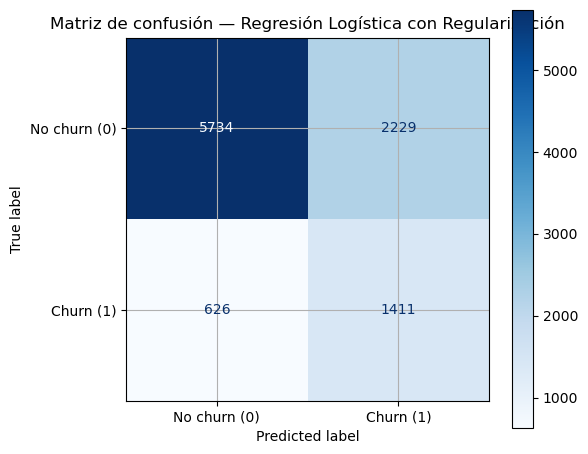

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_model = logreg_opt.best_estimator_ 

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

y_pred_oof = cross_val_predict(
    best_model, X, y,
    cv=outer_cv, n_jobs=-1, method="predict"
)

print(classification_report(
    y, y_pred_oof,
    target_names=["No churn (0)", "Churn (1)"],
    digits=4
))

cm = confusion_matrix(y, y_pred_oof, labels=[0, 1])

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No churn (0)", "Churn (1)"])
disp.plot(ax=ax, values_format=".0f", colorbar=True, cmap="Blues")
ax.grid(True)  
ax.set_title("Matriz de confusión — Regresión Logística con Regularización")
plt.tight_layout()
plt.show()

---

## Máquina de vectores de soporte con kernel RBF

In [21]:
# Definir modelo
svc = SVC(kernel='rbf', random_state=42)

# Pipeline
svm_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', svc)
])

# Busqueda de la optimización
svm_space = [
    {   # Opción 1: gamma simbólico
        "clf__C": Real(1e-3, 1e3, prior="log-uniform"),
        "clf__gamma": Categorical(["scale", "auto"]),
        "clf__class_weight": Categorical([None, "balanced"]),
        "clf__shrinking": Categorical([True, False]),
    },
    {   # Opción 2: gamma continuo
        "clf__C": Real(1e-3, 1e3, prior="log-uniform"),
        "clf__gamma": Real(1e-4, 10, prior="log-uniform"),
        "clf__class_weight": Categorical([None, "balanced"]),
        "clf__shrinking": Categorical([True, False]),
    },
]

# Optimización
svm_opt = BayesSearchCV(
    estimator=svm_pipe,
    search_spaces=svm_space,
    scoring=scoring,
    refit=True,
    cv=cv,
    n_iter=30,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
svm_opt.fit(X, y)
print("Mejores hiperparámetros SVM RBF:")
print(svm_opt.best_params_)

# F1 promedio y std
svm_scores = cross_validate(
    svm_opt.best_estimator_, X, y,
    cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)

svm_mean = svm_scores["test_score"].mean()
svm_std  = svm_scores["test_score"].std()

print(f"F1 promedio: {svm_mean}")
print(f"F1 std: {svm_std}")

Mejores hiperparámetros SVM RBF:
OrderedDict({'clf__C': 358.7964380817534, 'clf__class_weight': 'balanced', 'clf__gamma': 0.010471954614138213, 'clf__shrinking': False})
F1 promedio: 0.5996008091012928
F1 std: 0.019585796051123282


              precision    recall  f1-score   support

No churn (0)     0.9254    0.8066    0.8619      7963
   Churn (1)     0.4966    0.7457    0.5962      2037

    accuracy                         0.7942     10000
   macro avg     0.7110    0.7762    0.7290     10000
weighted avg     0.8380    0.7942    0.8078     10000



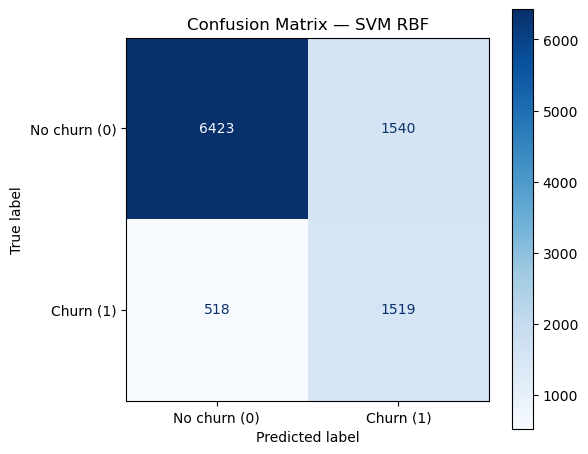

In [22]:
#Mejor modelo de la optimización
best_model = svm_opt.best_estimator_

# CV externa, es como si usaramos train y test, este caso seria test
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Predicciones out-of-fold
y_pred_oof = cross_val_predict(
    best_model, X, y,
    cv=outer_cv, n_jobs=-1, method="predict"
)

# Reporte out-of-fold
print(classification_report(
    y, y_pred_oof,
    target_names=["No churn (0)", "Churn (1)"],
    digits=4
))

# Matriz de confusión OOF
cm = confusion_matrix(y, y_pred_oof, labels=[False, True])
fig, ax = plt.subplots(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No churn (0)", "Churn (1)"])
disp.plot(ax=ax, values_format="d", colorbar=True, cmap="Blues")
ax.grid(False)
ax.set_title("Confusion Matrix — SVM RBF")
plt.tight_layout()
plt.show()